In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\djamb\OneDrive - Université Centrale\ML PROJECTS\email-classification\data\data.csv", encoding='latin1')
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


### Data cleaning

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
#Drop unwanted columns
data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)


#Rename the columns
data.rename(columns={'v1': 'message_type','v2':'message'},inplace=True)

data.sample(10)

,message_type,message
863,ham,Did u find out what time the bus is at coz i n...
4902,ham,"\I;m reaching in another 2 stops.\"""""
4867,ham,"Watching cartoon, listening music &amp; at eve..."
1132,ham,Good morning princess! How are you?
4717,ham,My uncles in Atlanta. Wish you guys a great se...
91,ham,Sorry to be a pain. Is it ok if we meet anothe...
3051,ham,Please leave this topic..sorry for telling that..
1156,ham,Hey.. Something came up last min.. Think i wun...
4304,ham,Yo come over carlos will be here soon
4205,ham,"Get the door, I'm here"


As this is a classification problem , we want the **message_type** to be binary classified i.e 0 or 1
So for this purpose we use LabelEncoder from sklearn

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['message_type'] = le.fit_transform(data['message_type'])
data['message_type'].unique()

array([0, 1])

In [6]:
data[data['message_type']==1].shape[0]

747

In [7]:
data[data['message_type']==0].shape[0]

4825

In [8]:
data.isnull().sum()

message_type    0
message         0
dtype: int64

In [9]:
data.duplicated().sum()

403

We have to remove these duplicates values and keep the first 

In [10]:
data.drop_duplicates(inplace=True,keep='first')
data.duplicated().sum()

0

#### EDA



In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
data['message_type'].value_counts()

message_type
0    4516
1     653
Name: count, dtype: int64

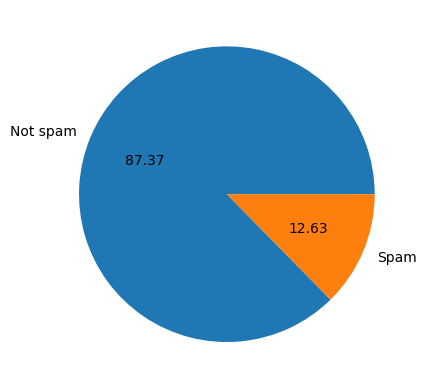

In [13]:
plt.pie(data['message_type'].value_counts(),labels=['Not spam','Spam'],autopct="%0.2f")
plt.show()

As we can see, this is an imbalanced data 

Now let’s find out :

- No. of characters in the data
- No. of words in the data
- No. of sentences in the data

and form 3 new columns in the data depicting the no. of character, words and sentences.

In [14]:
#Natural language toolkit
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\djamb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
#numbers_of_characters

data['num_characters'] = data['message'].apply(len)
data.head()

,message_type,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
#Tokenise? break (text) into individual linguistic units.
from nltk.tokenize import word_tokenize
data['message'].apply(lambda x: nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [17]:
# num_of_words
data['num_words'] = data['message'].apply(lambda x:len(nltk.word_tokenize(x)))
data.sample(10)

,message_type,message,num_characters,num_words
4246,1,Text PASS to 69669 to collect your polyphonic ...,105,19
1351,0,Yo theres no class tmrw right?,30,7
4627,1,Todays Voda numbers ending with 7634 are selec...,166,30
3201,0,Okay lor... Wah... like that def they wont let...,110,26
2923,0,Thts god's gift for birds as humans hav some n...,67,15
3980,0,Huh i cant thk of more oredi how many pages do...,55,14
4810,0,E admin building there? I might b slightly ear...,86,20
2424,0,Oh k k:)but he is not a big hitter.anyway good,46,13
1728,0,As per your request 'Maangalyam (Alaipayuthe)'...,136,27
5336,0,Sounds better than my evening im just doing my...,126,28


In [18]:
#Number of sentences

data['num_sentences'] = data['message'].apply(lambda x:len(nltk.sent_tokenize(x)))
data.sample(4)

,message_type,message,num_characters,num_words,num_sentences
983,0,LOOK AT THE FUCKIN TIME. WHAT THE FUCK YOU THI...,54,13,2
1023,0,May i call You later Pls,24,6,1
4045,1,Win a å£1000 cash prize or a prize worth å£5000,47,10,1
2076,0,"Trust me. Even if isn't there, its there.",41,12,2


### Some Stats for Ham messages

In [19]:
#For ham messages
data[data['message_type']==0][['num_characters','num_words','num_sentences']].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
num_characters,4516.0,70.46,56.36,2.0,34.0,52.0,90.0,910.0
num_words,4516.0,17.12,13.49,1.0,8.0,13.0,22.0,220.0
num_sentences,4516.0,1.82,1.38,1.0,1.0,1.0,2.0,38.0


In [20]:
#For spam messages

data[data['message_type']==1][['num_characters','num_words','num_sentences']].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
num_characters,653.0,137.89,30.14,13.0,132.0,149.0,157.0,224.0
num_words,653.0,27.67,7.01,2.0,25.0,29.0,32.0,46.0
num_sentences,653.0,2.97,1.49,1.0,2.0,3.0,4.0,9.0


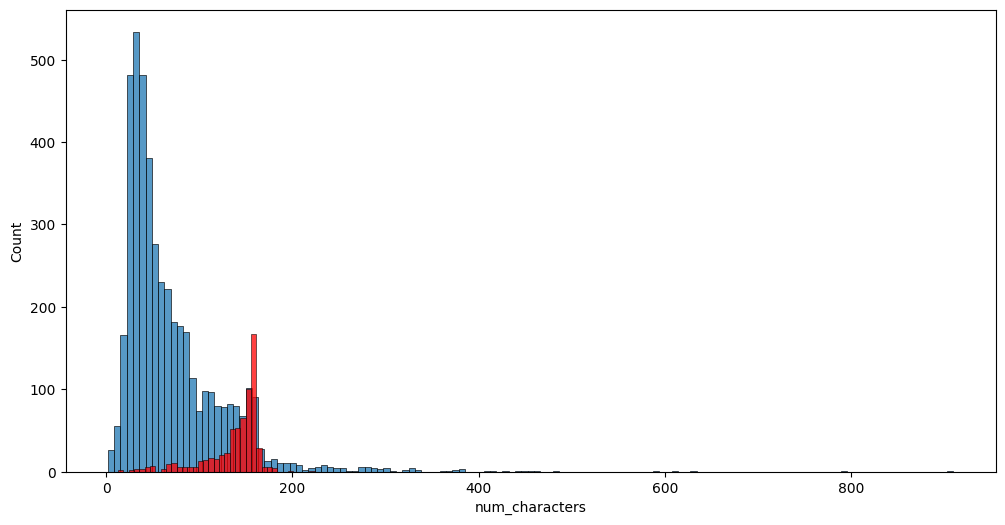

In [21]:
plt.figure(figsize=(12,6))
sns.histplot(x=data[data['message_type']==0]['num_characters'])
sns.histplot(x=data[data['message_type']==1]['num_characters'],color='red')
plt.show()

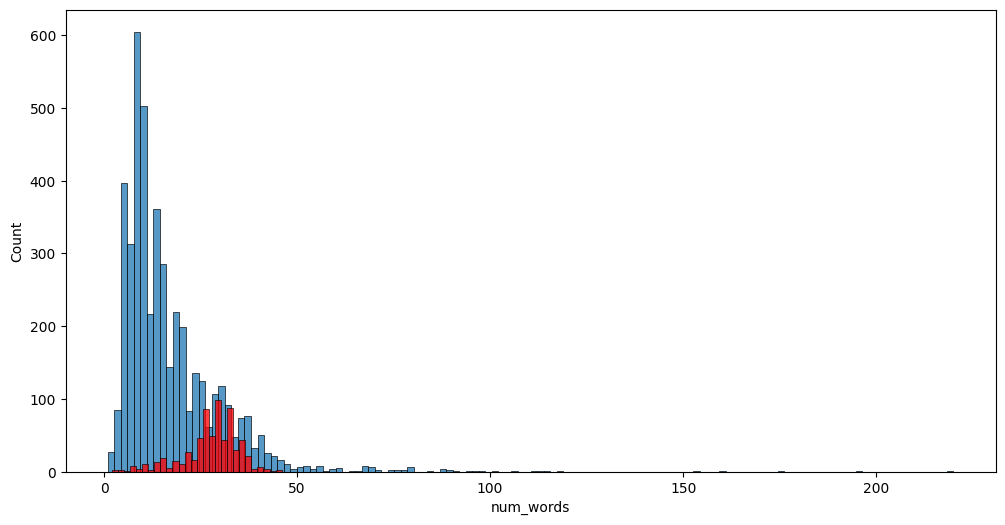

In [22]:
plt.figure(figsize=(12,6))
sns.histplot(x=data[data['message_type']==0]['num_words'])
sns.histplot(x=data[data['message_type']==1]['num_words'],color='red')
plt.show()

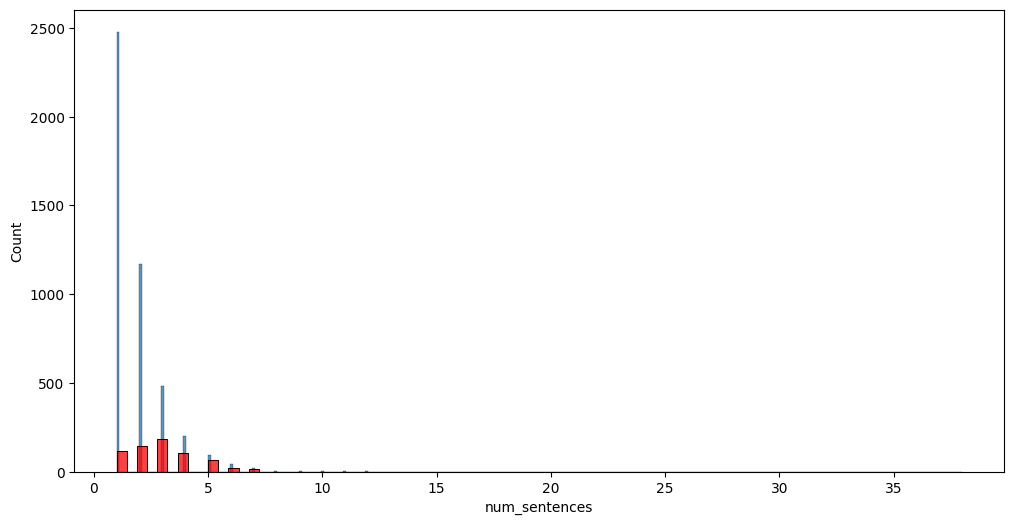

In [23]:
plt.figure(figsize=(12,6))
sns.histplot(x=data[data['message_type']==0]['num_sentences'])
sns.histplot(x=data[data['message_type']==1]['num_sentences'],color='red')
plt.show()

<Axes: >

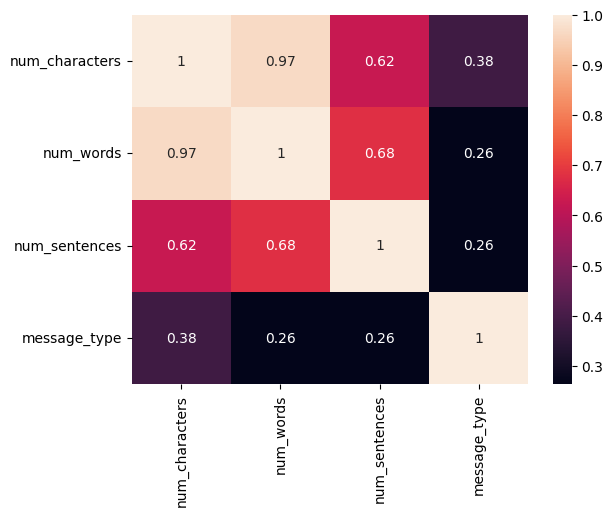

In [24]:
#Ploting a heatmap for the correlation
df = data[['num_characters','num_words','num_sentences','message_type']]
sns.heatmap(df.corr(),annot=True)

### Data Preprocessing

#### Steps :
+ LowerCase
+ Tokenisation
+ Removing special characters
+ Removing stop words and punctuation
+ Stemming — lemmatisation

In [25]:
# Removing stop words and punctuations
from nltk.corpus import stopwords
stopwords.words('english')
len(
stopwords.words('english'))

179

In [26]:
#now for punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
# Stemming

from nltk.stem.porter import PorterStemmer

ps = PorterStemmer()

In [28]:
#nltk.download('stopwords')
def text_transformation(message):
    message = message.lower()
    message = nltk.word_tokenize(message)
    y = []
    
    for i in message : 
        if i.isalnum():
            y.append(i)
        y.clear()
        
    #checking the ponctuations and stop words
    for i in message : 
        if i not in stopwords.words('english') and i not in string.punctuation :
            y.append(i)
        
    message = y[:]
    y.clear()
    
    #Now stemming function
    for i in message : 
        y.append(ps.stem(i))
        
    return " ".join(y)
            

In [29]:
# Now let’s apply the text_transform function to all the messages in the dataset.

data['transformed_message'] = data['message'].apply(text_transformation)
data.sample(20)

,message_type,message,num_characters,num_words,num_sentences,transformed_message
1710,0,"(No promises on when though, haven't even gott...",60,14,1,promis though n't even gotten dinner yet
1384,0,"Storming msg: Wen u lift d phne, u say \HELLO\...",278,80,14,storm msg wen u lift phne u say \hello\ '' u k...
2401,1,Babe: U want me dont u baby! Im nasty and have...,152,41,5,babe u want dont u babi im nasti thing 4 filth...
5119,0,Lol for real. She told my dad I have cancer,43,11,2,lol real told dad cancer
3282,0,Hey tmr maybe can meet you at yck,33,8,1,hey tmr mayb meet yck
410,0,Come by our room at some point so we can iron ...,75,17,1,come room point iron plan weekend
4794,0,Saw Guys and Dolls last night with Patrick Swa...,62,12,1,saw guy doll last night patrick swayz great
700,0,How much r Ì_ willing to pay?,29,8,1,much r ì_ will pay
391,0,Hey so this sat are we going for the intro pil...,80,18,2,hey sat go intro pilat kickbox
3808,0,At the funeral home with Audrey and dad,39,8,1,funer home audrey dad


To get a clear idea about the most frequent words used we make a  word cloud.

In [30]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [31]:
#For Spam:
spam_wc = wc.generate(data[data['message_type']==1]['transformed_message'].str.cat(sep=""))

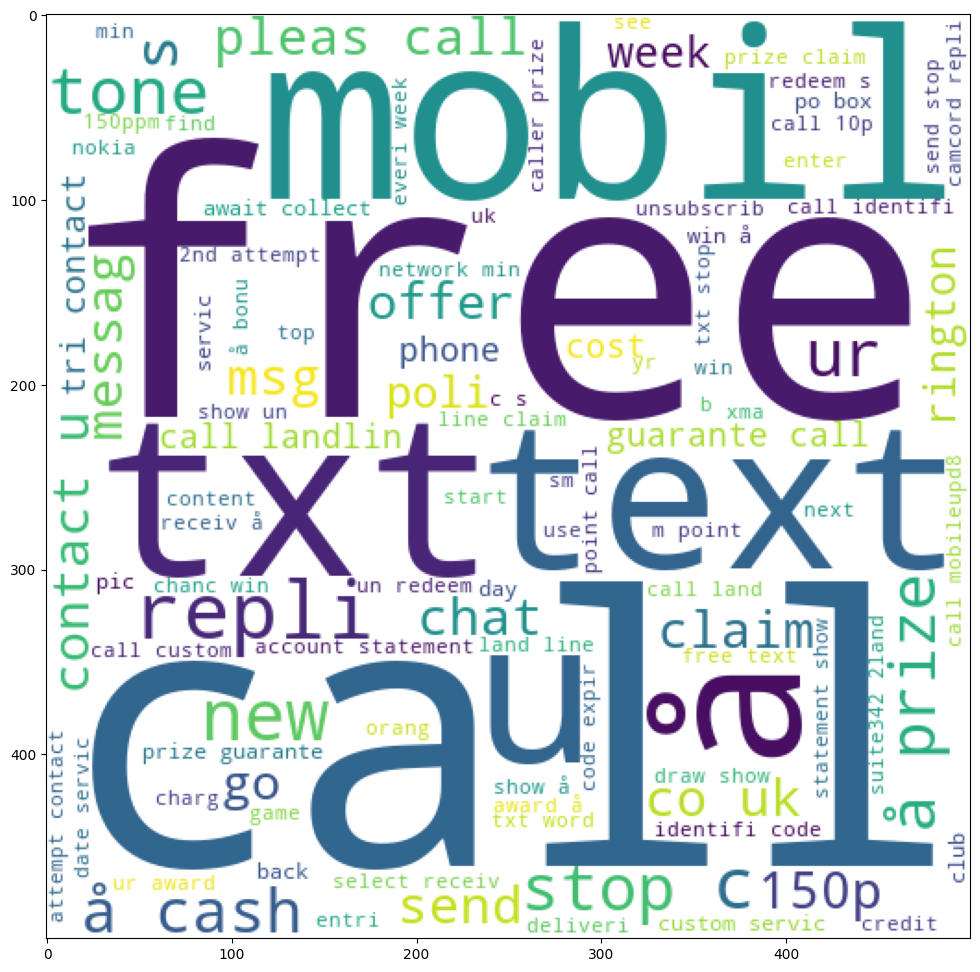

In [32]:
plt.figure(figsize=(12,12))
plt.imshow(spam_wc)

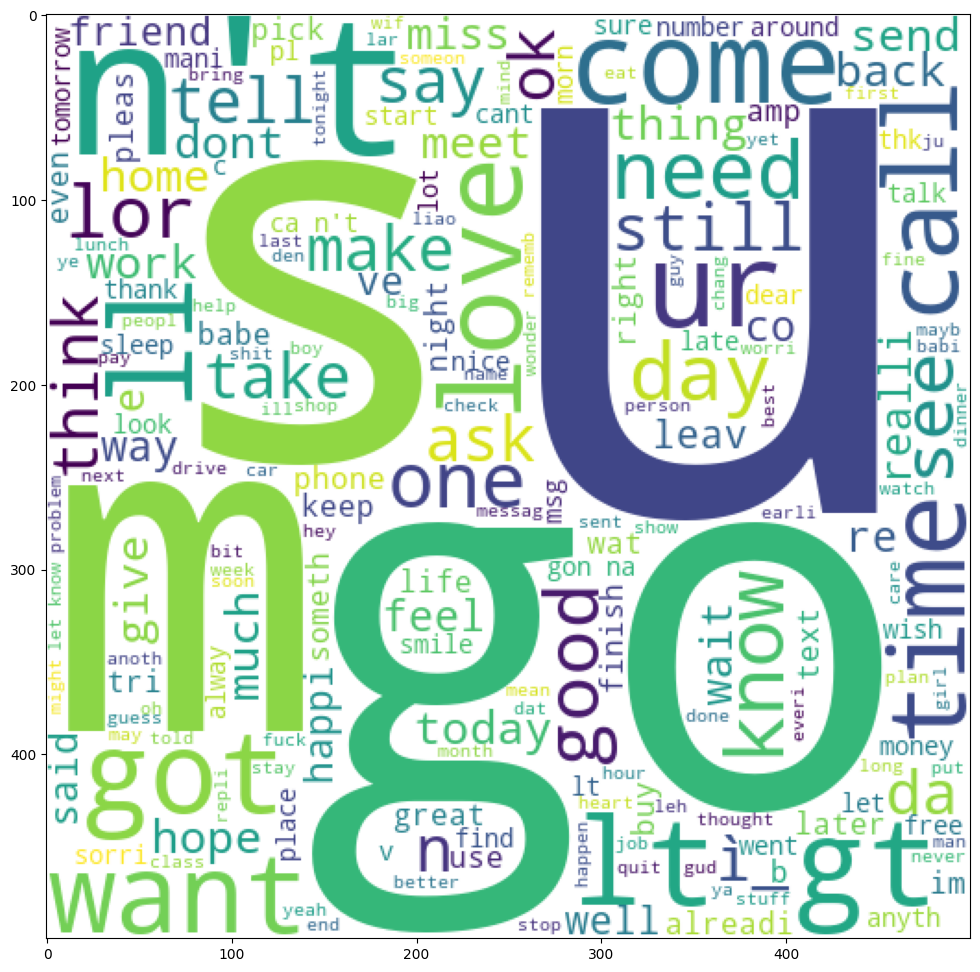

In [33]:
#For ham
spam_wc = wc.generate(data[data['message_type']==0]['transformed_message'].str.cat(sep=""))
plt.figure(figsize=(12,12))
plt.imshow(spam_wc)

To simplify what is drawn inside the WordClouds we will find out the top 30 words used in both ham as well as spam messages.

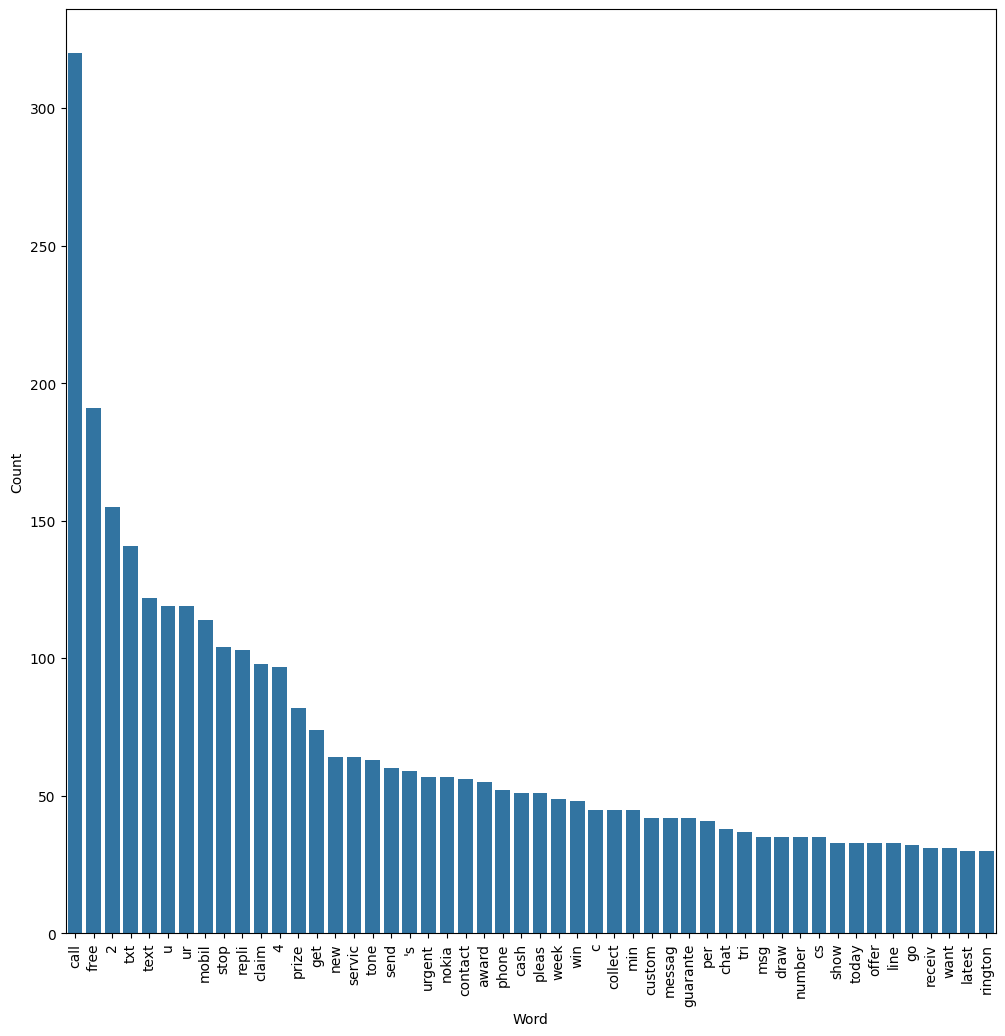

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

# Assuming 'data' is your DataFrame containing the transformed messages and message_type
spam_corpus = []
for msg in data[data['message_type'] == 1]['transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

# Count occurrences of each word
word_counts = Counter(spam_corpus)

# Get the 50 most common words
common_words = word_counts.most_common(50)

# Create a DataFrame from the common words list
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Plotting the bar plot
plt.figure(figsize=(12, 12))
sns.barplot(x='Word', y='Count', data=common_words_df)
plt.xticks(rotation='vertical')
plt.show()


#### Now Let's Build our MODEL

**As it is known that on Textual Data Naive Bayes Algorithm works the best hence we will use it but along the way also compare it with different algorithms**

How to vectorize:
+ Bag of Words
+ TFIDF
+ Word2vec

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid = TfidfVectorizer(max_features=3000)

In [36]:
X = tfid.fit_transform(data['transformed_message']).toarray()

y = data['message_type'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1234)


In [37]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [42]:
import mlflow
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

# Configuration de l'URI de suivi
mlflow.set_tracking_uri(uri='http://127.0.0.1:5000')

# Définition de l'expérience MLflow
mlflow.set_experiment('Email_classification')

<Experiment: artifact_location='mlflow-artifacts:/556403323845825545', creation_time=1711406394120, experiment_id='556403323845825545', last_update_time=1711406394120, lifecycle_stage='active', name='Email_classification', tags={}>

In [46]:
import numpy as np

In [49]:

with mlflow.start_run(run_name="classification_of_email") as run:
    # Instanciation des modèles   
    gnb = GaussianNB()
    bnb = BernoulliNB()
    mnb = MultinomialNB()
    
    # Entraînement des modèles
    gnb.fit(X_train, y_train)
    mnb.fit(X_train, y_train)
    bnb.fit(X_train, y_train)
    
    # Prédiction 
    y_pred1 = gnb.predict(X_test)
    y_pred2 = mnb.predict(X_test)
    y_pred3 = bnb.predict(X_test)
    
    # Évaluation des modèles
    accuracy1 = accuracy_score(y_test, y_pred1)
    accuracy2 = accuracy_score(y_test, y_pred2)
    accuracy3 = accuracy_score(y_test, y_pred3)
    
    precision1 = precision_score(y_test, y_pred1)
    precision2 = precision_score(y_test, y_pred2)
    precision3 = precision_score(y_test, y_pred3)
    
    confusion1 = confusion_matrix(y_test, y_pred1)
    confusion2 = confusion_matrix(y_test, y_pred2)
    confusion3 = confusion_matrix(y_test, y_pred3)
    
    # Suivi des métriques
    mlflow.log_metric("Accuracy_GaussianNB", accuracy1)
    mlflow.log_metric("Accuracy_BernoulliNB", accuracy2)
    mlflow.log_metric("Accuracy_MultinomialNB", accuracy3)
    
    mlflow.log_metric("Precision_GaussianNB", precision1)
    mlflow.log_metric("Precision_BernoulliNB", precision2)
    mlflow.log_metric("Precision_MultinomialNB", precision3)
    
    # Enregistrement des matrices de confusion sous forme de fichiers locaux
    np.save("confusion_matrix_GaussianNB.npy", confusion1)
    np.save("confusion_matrix_BernoulliNB.npy", confusion2)
    np.save("confusion_matrix_MultinomialNB.npy", confusion3)

    # Suivi des matrices de confusion (en tant qu'artefacts)
    mlflow.log_artifact("confusion_matrix_GaussianNB.npy")
    mlflow.log_artifact("confusion_matrix_BernoulliNB.npy")
    mlflow.log_artifact("confusion_matrix_MultinomialNB.npy")
    
    # Log des paramètres
    """mlflow.log_params({
        "Model": ["GaussianNB", "BernoulliNB", "MultinomialNB"]
    })"""
    
    # Enregistrement des modèles
    mlflow.sklearn.log_model(gnb, "GaussianNB_model")
    mlflow.sklearn.log_model(bnb, "BernoulliNB_model")
    mlflow.sklearn.log_model(mnb, "MultinomialNB_model")
    print("Completed successfully")


d:\Anaconda\envs\data_science\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
d:\Anaconda\envs\data_science\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


Completed successfully


### Save the Model

In [ ]:
"""import pickle
pickle.dump(tfid,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))"""

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])